In [1]:
pip install tensorflow

   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 1.0/390.3 MB 7.2 MB/s eta 0:00:54
   ---------------------------------------- 1.6/390.3 MB 3.5 MB/s eta 0:01:52
   ---------------------------------------- 2.4/390.3 MB 3.6 MB/s eta 0:01:47
   ---------------------------------------- 3.7/390.3 MB 4.2 MB/s eta 0:01:33
   ---------------------------------------- 4.5/390.3 MB 4.1 MB/s eta 0:01:34
    --------------------------------------- 5.0/390.3 MB 4.1 MB/s eta 0:01:35
    --------------------------------------- 6.0/390.3 MB 4.1 MB/s eta 0:01:35
    --------------------------------------- 6.8/390.3 MB 4.0 MB/s eta 0:01:36
    --------------------------------------- 7.6/390.3 MB 4.0 MB/s eta 0:01:36
    --------------------------------------- 8.7/390.3 MB 4.0 MB/s eta 0:01:36
    --------------------------------------- 9.2/390.3 MB 4.0 MB/s eta 0:01:36
   - -------------------------------------- 10.2/390.3 MB 4.0 MB/s eta 

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [5]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1 by dividing by 255
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 188s 1us/step


In [7]:
# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Display the model summary
model.summary()


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [11]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 28ms/step - accuracy: 0.3382 - loss: 1.7804 - val_accuracy: 0.5418 - val_loss: 1.2778
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.5805 - loss: 1.1807 - val_accuracy: 0.6158 - val_loss: 1.0737
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 28ms/step - accuracy: 0.6466 - loss: 1.0115 - val_accuracy: 0.6539 - val_loss: 0.9892
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.6836 - loss: 0.9067 - val_accuracy: 0.6722 - val_loss: 0.9394
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 30ms/step - accuracy: 0.7107 - loss: 0.8291 - val_accuracy: 0.6960 - val_loss: 0.8873
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 28ms/step - accuracy: 0.7315 - loss: 0.7716 - val_accuracy: 0.6867 - val_loss: 0.9017
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.7482 - loss: 0.7171 - val_accuracy: 0.7050 - val_loss: 0.8708
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.7648 -

In [13]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')


313/313 - 2s - 6ms/step - accuracy: 0.7116 - loss: 0.8706
Test accuracy: 0.7116000056266785


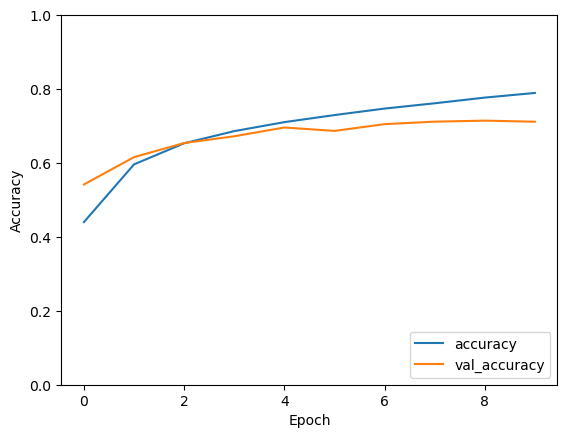

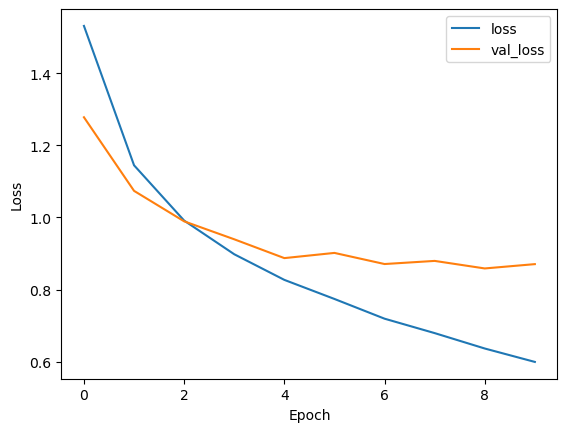

In [15]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


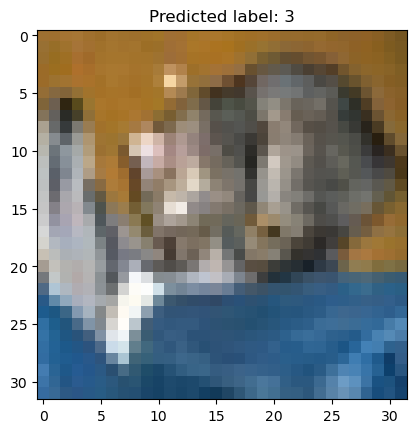

In [17]:
# Make predictions
predictions = model.predict(test_images)

# Display the first image and its prediction
plt.imshow(test_images[0])
plt.title(f'Predicted label: {tf.argmax(predictions[0]).numpy()}')
plt.show()
